<a href="https://colab.research.google.com/github/sido066/Stock-Price-Prediction/blob/main/Stock_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

### Simulate Sample Stock Data

In [ ]:
np.random.seed(42)
days = pd.date_range(start='2022-01-01', periods=200)
close_prices = np.cumsum(np.random.randn(200) * 2 + 0.5) + 100

df = pd.DataFrame({
    'Date': days,
    'Close': close_prices
})
df['Open'] = df['Close'] + np.random.randn(200)
df['High'] = df[['Open', 'Close']].max(axis=1) + np.random.rand(200)
df['Low'] = df[['Open', 'Close']].min(axis=1) - np.random.rand(200)
df['Volume'] = np.random.randint(100000, 500000, size=200)

df['MA5'] = df['Close'].rolling(window=5).mean()
df['MA10'] = df['Close'].rolling(window=10).mean()
df.dropna(inplace=True)
df.head()

,Date,Close,Open,High,Low,Volume,MA5,MA10
9,2022-01-10,113.961222,117.813954,118.758719,113.084022,413837,111.410863,107.792528
10,2022-01-11,113.534387,114.105277,114.954925,113.141942,216739,112.693389,108.996624
11,2022-01-12,113.102927,114.238493,114.485841,112.286328,418105,113.157938,110.135227
12,2022-01-13,114.086852,115.040854,115.491398,113.647717,338009,113.412298,111.192684
13,2022-01-14,110.760291,111.411683,111.540842,110.383347,356028,113.089136,111.562880


In [ ]:
X = df[['Open', 'High', 'Low', 'Volume', 'MA5', 'MA10']]
y = df['Close']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [ ]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.2f}")
print(f"R² Score: {r2:.2f}")

Mean Squared Error: 0.11
R² Score: 1.00


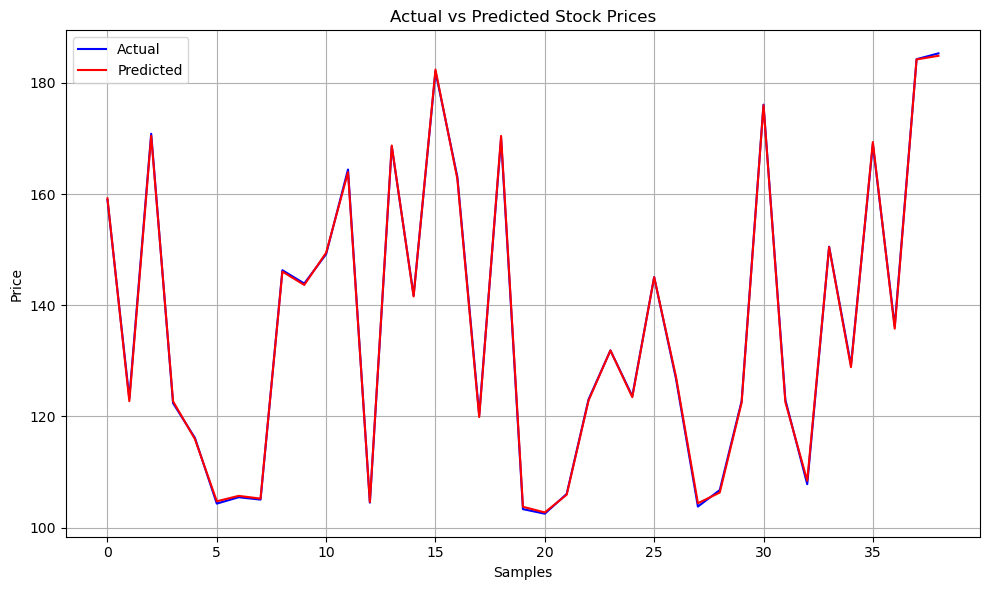

In [ ]:
plt.figure(figsize=(10,6))
plt.plot(y_test.values, label='Actual', color='blue')
plt.plot(y_pred, label='Predicted', color='red')
plt.title("Actual vs Predicted Stock Prices")
plt.xlabel("Samples")
plt.ylabel("Price")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()